In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_2d = pd.read_csv("C:\\Users\Aliaksey\\OneDrive\\Desktop\\Projects GOIT\\Data Science\\General\\data_for_HW_06\\data_2d.csv", header = None)
data_mnist = pd.read_csv("C:\\Users\Aliaksey\\OneDrive\\Desktop\\Projects GOIT\\Data Science\\General\\data_for_HW_06\\mnist.csv", header = None)
display(data_2d.head())
display(data_mnist.head())

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


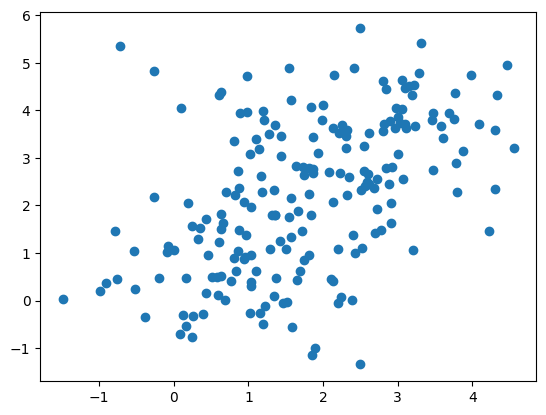

In [4]:
plt.scatter(data_2d[1], data_2d[2])
plt.show()

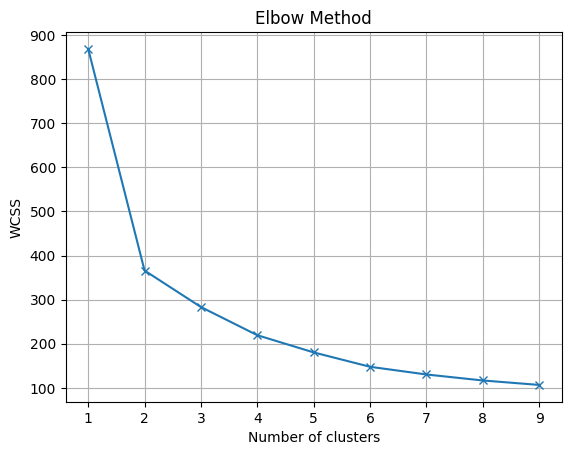

In [5]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(data_2d)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss, marker = 'x')
plt.grid()
plt.xticks(np.arange(1,10))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

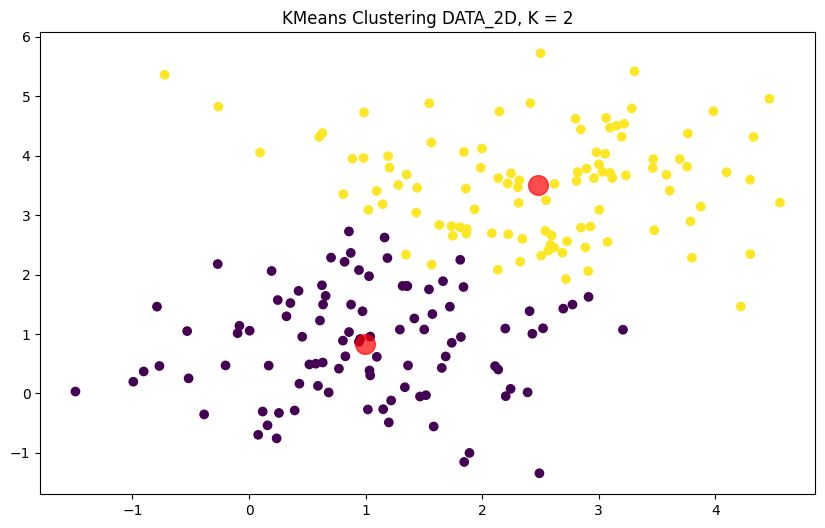

In [6]:
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(data_2d)

plt.figure(figsize=(10,6))
plt.scatter(data_2d[1], data_2d[2], c=kmeans.labels_, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.7, label='Centroids')
plt.title('KMeans Clustering DATA_2D, K = 2')
plt.show()

In [7]:
scaler = StandardScaler()
mnist_skaled = scaler.fit_transform(data_mnist)

pca = PCA(2)
principalComponents = pca.fit_transform(mnist_skaled)
data_mnist_pca = pd.DataFrame(data = principalComponents, columns=[1, 2])
data_mnist_pca.head()

,1,2
0,-4.528494,4.197220
1,5.025943,-12.464675
2,-6.907401,-5.890575
3,8.584208,-0.337364
4,1.105909,6.577171


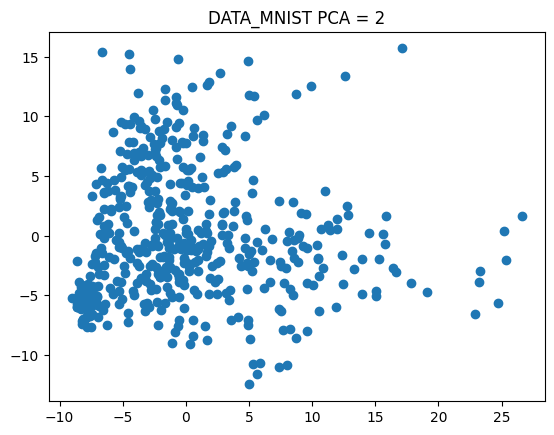

In [8]:
plt.scatter(data_mnist_pca[1], data_mnist_pca[2])
plt.title('DATA_MNIST PCA = 2')
plt.show()

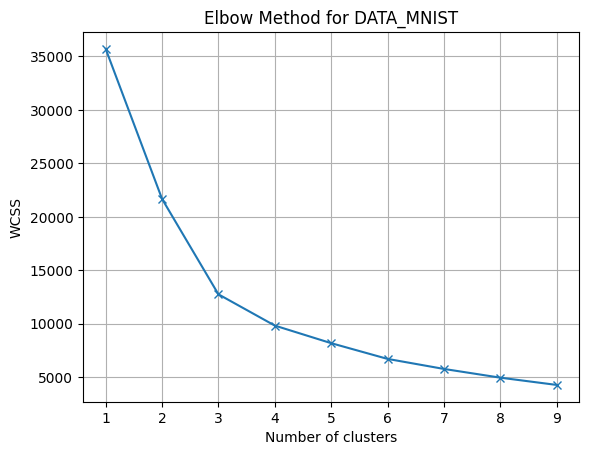

In [9]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(data_mnist_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss, marker = 'x')
plt.grid()
plt.xticks(np.arange(1,10))
plt.title('Elbow Method for DATA_MNIST')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

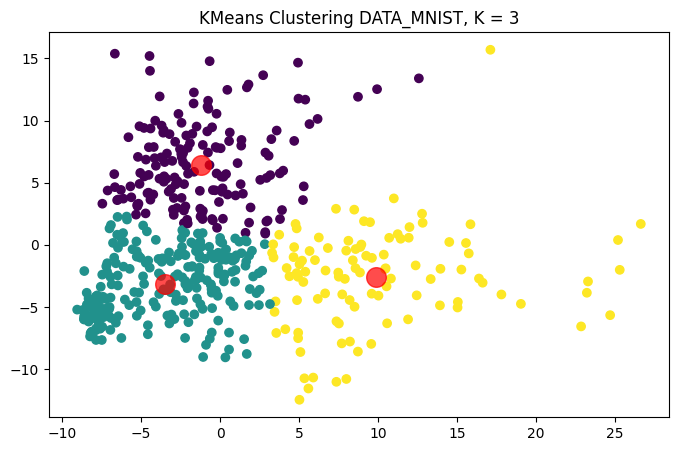

In [10]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(data_mnist_pca)

plt.figure(figsize=(8,5))
plt.scatter(data_mnist_pca[1], data_mnist_pca[2], c=kmeans.labels_, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, label='Centroids')
plt.title('KMeans Clustering DATA_MNIST, K = 3')
plt.show()